In [155]:
import time
import pylab
import numpy

# Лабораторная работа 2. Методы поиска

**Цель работы:** ознакомление с алгоритмами поиска в линейных  и нелинейных структурах  и  оценкой эффективности алгоритмов.

### Вариант 19

# Задание 1

### Тема:"Поиск корней уравнений (Метод Бисекции)"

**Метод бисекции** или **метод деления отрезка пополам** — простейший численный метод для решения нелинейных уравнений вида f(x)=0. Предполагается только непрерывность функции f(x). Поиск основывается на теореме о промежуточных значениях.

Алгоритм основан на следствии из теоремы **Больцано — Коши**:
Если мы ищем ноль, то на концах отрезка функция должна быть противоположных знаков. Разделим отрезок пополам и возьмём ту из половинок, на концах которой функция по-прежнему принимает значения противоположных знаков. Если значение функции в серединной точке оказалось искомым нулём, то процесс завершается.

Точность вычислений задаётся одним из двух способов:
- ${\displaystyle \varepsilon _{f(x)}}$ по оси $y$, что ближе к условию $f(x)=0$ из описания алгоритма; или
- ${\displaystyle \varepsilon _{f(x)}}$, по оси $x$, что может оказаться удобным в некоторых случаях.

Процедуру следует продолжать до достижения заданной точности.

Для поиска произвольного значения достаточно вычесть из значения функции искомое значение и искать ноль получившейся функции

### Сложность
- в лучшем случае: $O(n)$
- в худшем случае: $O(N^2)$
- в среднем: $O(Nlog_2N)$
- поиск M элементов в среднем случае $O(max(N,M)∗log_2N)$ 
- Затраты памяти $O(N)$

### Блок-схема агоритма

![img](divide.jpg)

### Псевдокод алгоритма

In [ ]:
леваяГраница = левГран
праваяГраница = правГран
while (праваяГраница - леваяГраница > 1) {
   длинаОтрезка = правГран - левГран
   половинаОтрезка = int(длинаОтрезка / 2) 
   середина = леваяГраница + половинаОтрезка
   if (sign(массив[леваяГраница]) ≠ sign(массив[середина]))
      праваяГраница = середина
   else
      леваяГраница = середина
}
printf середина

### Реализация алгоритма

In [ ]:
import math

func_glob =  lambda x: 2 * x ** 3 - 3 * x ** 2 - 12 * x - 5
# a1, b1 - левая и правая границы
a1, b1 = 0.0, 10.0
# e - заданная точность
# метод половинного деления (бисекции)
def half_divide_method(a, b, f, e = 0.001):
    x = (a + b) / 2
    while math.fabs(f(x)) >= e:
        x = (a + b) / 2
        a, b = (a, x) if f(a) * f(x) < 0 else (x, b)
    return (a + b) / 2

X = numpy.arange(-2.0, 4.0, 0.1)
pylab.plot([x for x in X], [func_glob(x) for x in X])
pylab.grid(True)
#pylab.show()

print ('Корень уравнения, найденный по методу бисекции: %s' % half_divide_method(a1, b1, func_glob))

### Тесты

In [ ]:
assert half_divide_method(a1, b1, func_glob) == 3.4495162963867188, 'Ошибка при поиске'

assert half_divide_method(-2.0, -2.1, func_glob) == 0, 'Ошибка при поиске в интервале без решения'

assert half_divide_method(0, 0, func_glob) == 0, 'Ошибка при поиске в нулевом интервале'

**Время**

In [149]:
times = {}
t = 0

In [172]:
times.clear()
eps1 = 10**(-200)
start = time.time()
half_divide_method(a1, b1, func_glob, e = eps1)

end = time.time()
t = end * 10**6 - start * 10**6
times[1] = t
print(t)

998.5


In [173]:
eps2 = 10**(-300)
start = time.time()
half_divide_method(a1, b1, func_glob, e = eps2)

end = time.time()
t = end * 10**6 - start * 10**6
times[2] = t
print(t)

996.5


In [175]:
start = time.time()
eps3 = 10**(-320.5)
half_divide_method(a1, b1, func_glob, e = eps3)

end = time.time()
t = end * 10**6 - start * 10**6
times[3] = t
print(t)

1033.25


In [254]:
start = time.time()
eps4 = 10**(-322)
half_divide_method(a1, b1, func_glob, e = eps4)

end = time.time()
t = end * 10**6 - start * 10**6
times[4] = t
print(t)

997.25


**График**

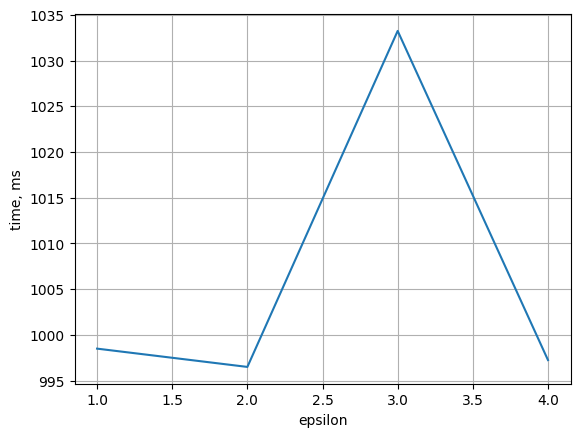

In [255]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times.keys(), times.values())
plt.ylabel('time, ms')
plt.xlabel('epsilon')
plt.grid(True)
plt.show()

https://ru.wikipedia.org/wiki/Метод_бисекции
https://ru.zahn-info-portal.de/wiki/Bisection_method
https://fadeevlecturer.github.io/python_lectures
https://icpc.appmat.ru/presentation?filename=26feb2019#/6

# Задание 2

### Тема:"Поиск подстроки в строке (Алгоритм Кнута — Морриса — Пратта)"

**Алгоритм Кнута — Морриса — Пратта** (КМП-алгоритм) — эффективный алгоритм, осуществляющий поиск подстроки в строке. Время работы алгоритма линейно зависит от объёма входных данных, то есть разработать асимптотически более эффективный алгоритм невозможно.

Алгоритм был разработан Д. Кнутом и В. Праттом и, независимо от них, Д. Моррисом. Результаты своей работы они опубликовали совместно в 1977 году.

КМП позволяет находить префикс-функцию от строки за линейное время, и имеет достаточно лаконичную реализацию, по длине не превышающую наивный алгоритм.

Дана цепочка $T$ и образец $P$. Требуется найти все позиции, начиная с которых $P$ входит в $T$. Построим строку $S=P#T$, где # — любой символ, не входящий в алфавит P и T. Посчитаем на ней значение префикс-функции $p$. Благодаря разделительному символу #, выполняется $∀i:p[i]⩽|P|$. Заметим, что по определению префикс-функции при $i>|P|$ и $p[i]=|P|$ подстроки длины $P$, начинающиеся с позиций 0 и $i−|P|+1$, совпадают. Соберем все такие позиции $i−|P|+1$ строки $S$, вычтем из каждой позиции $|P|+1$, это и будет ответ. Другими словами, если в какой-то позиции $i$ выполняется условие $p[i]=|P|$, то в этой позиции начинается очередное вхождение образца в цепочку.


### Сложность
- в худшем случае:$O(m) - препроцессинг, O(n) - подбор$
- Сложность по затратам памяти в худшем случае - $O(m)$

### Блок-схема агоритма

![img](str.jpg)

### Псевдокод алгоритма

```
algorithm kmp_table:
    input:
        an array of characters, W (the word to be analyzed)
    output:
        an array of integers, T (the table to be filled)

    define variables:
        an integer, pos ← 1 (the current position we are computing in T)
        an integer, cnd ← 0 (the zero-based index in W of the next character of the current candidate substring)

    let T[0] ← -1

    while pos < length(W) do
        if W[pos] = W[cnd] then
            let T[pos] ← T[cnd]
        else
            let T[pos] ← cnd
            while cnd ≥ 0 and W[pos] ≠ W[cnd] do
                let cnd ← T[cnd]
        let pos ← pos + 1, cnd ← cnd + 1

    let T[pos] ← cnd (only needed when all word occurrences are searched)
```


### Реализация алгоритма

In [164]:
def prefix(s):
    v = [0] * len(s)
    for i in range(1, len(s)):
        k = v[i - 1]
        while k > 0 and s[k] != s[i]:
            k = v[k - 1]
        if s[k] == s[i]:
            k = k + 1
        v[i] = k
    return v


def kmp(s, t, start_index):
    index = -1
    f = prefix(s)
    k = 0
    for i in range(start_index, len(t)):
        while k > 0 and s[k] != t[i]:
            k = f[k - 1]
        if s[k] == t[i]:
            k = k + 1
        if k == len(s):
            index = i - len(s) + 1
            break
    return index


def kmp_start(s, t):
    index = -len(s)
    found_indexes = []
    while True:
        index = kmp(s, t, index + 3)
        if index == -1:
            break
        else:
            found_indexes.append(index)
    return found_indexes


### Тесты

In [ ]:
assert kmp_start('aba', 'abacaba') == [0, 4], 'Ошибка в тесте на несколько встреч'

assert kmp_start('aba', 'cabaca') == [1], 'Ошибка в тесте на среднее значение'

assert kmp_start('aba', 'acacaba') == [4], 'Ошибка в тесте последнее значение'

assert kmp_start('aba', 'aaaaaaaa') == [], 'Ошибка в тесте на отсутствие присутствий :)'

In [ ]:
file = open('src/harry.txt', 'r')
text = file.read()

assert len(kmp_start('harry', text.lower())) == 1327, 'Ошибка в подсчетах количества встреченных случаев'
print(len(kmp_start('harry', text.lower())), '- количество встреченных \"Harry\"')

https://ru.wikipedia.org/wiki/Алгоритм_Кнута_—_Морриса_—_Пратта
https://e-maxx.ru/algo/prefix_function